In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('../../dataset/online_gaming_behavior_dataset.csv')
df


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


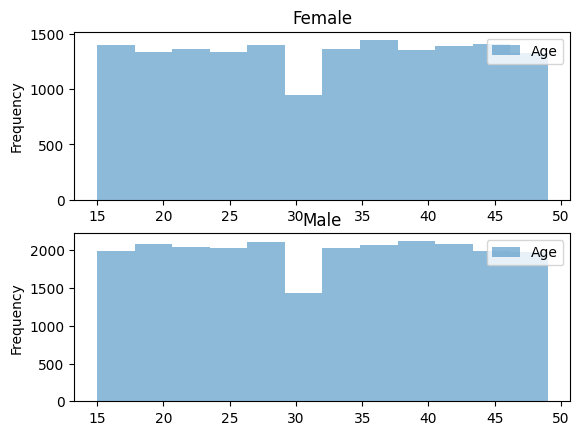

In [41]:
ax = df.plot.hist(column=["Age"], bins=12, alpha=0.5, by="Gender")

Text(0.5, 1.0, 'Age Vs Gender')

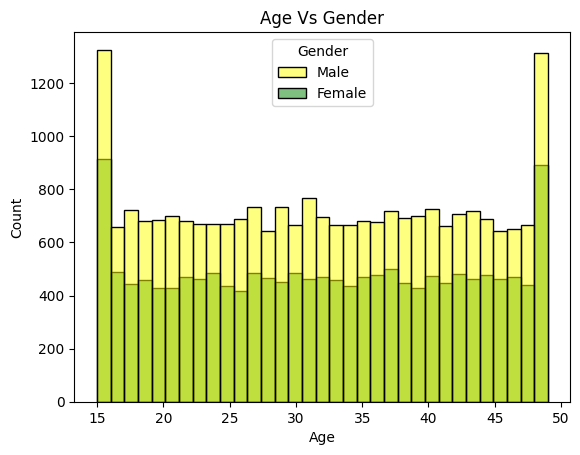

In [42]:
sns.histplot(data=df, x='Age', hue='Gender', palette=['yellow', 'green']).set_title(f"Age Vs Gender")

In [43]:
sns.pairplot(df, hue ='EngagementLevel')
# to show
plt.show()

KeyboardInterrupt: 

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
lables = df.EngagementLevel.unique()
def plot_confusion(y_test, y_pred, classes):
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix', fontsize=15, pad=20)
    plt.xlabel('Prediction', fontsize=11)
    plt.ylabel('Actual', fontsize=11)
    #Customizations
    plt.gca().xaxis.set_label_position('top')
    plt.gca().xaxis.tick_top()
    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
    
    plt.show()

## Test Train Split

In [56]:
X = df.drop(labels = ['EngagementLevel', 'PlayerID'], axis=1)
y = df.EngagementLevel
cat = X.select_dtypes(include=['object']).columns
classes = dict()
le = LabelEncoder()
for col in cat:
    X[col]= le.fit_transform(X[col])
    classes[col] = le.classes_
classes

{'Gender': array(['Female', 'Male'], dtype=object),
 'Location': array(['Asia', 'Europe', 'Other', 'USA'], dtype=object),
 'GameGenre': array(['Action', 'RPG', 'Simulation', 'Sports', 'Strategy'], dtype=object),
 'GameDifficulty': array(['Easy', 'Hard', 'Medium'], dtype=object)}

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42, stratify = y)
X_train

array([[ 33.,   1.,   1., ...,  11.,   8.,  40.],
       [ 47.,   1.,   2., ...,  31.,  12.,  10.],
       [ 49.,   0.,   1., ...,  37.,  81.,  17.],
       ...,
       [ 48.,   0.,   3., ...,  86.,  25.,  13.],
       [ 30.,   0.,   0., ..., 163.,  68.,  30.],
       [ 28.,   0.,   0., ...,  39.,  73.,  37.]])

## K-NN Classifire

In [58]:
for n in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f'{n}-Neighbors accuracy = {accuracy_score(y_test, y_pred)}')

1-Neighbors accuracy = 0.7191740904171177
3-Neighbors accuracy = 0.7569727749562901
5-Neighbors accuracy = 0.7703771542752477
7-Neighbors accuracy = 0.7824494213637498
9-Neighbors accuracy = 0.787861127299975
11-Neighbors accuracy = 0.7876946132711681
13-Neighbors accuracy = 0.7883606693863958
15-Neighbors accuracy = 0.7881941553575889


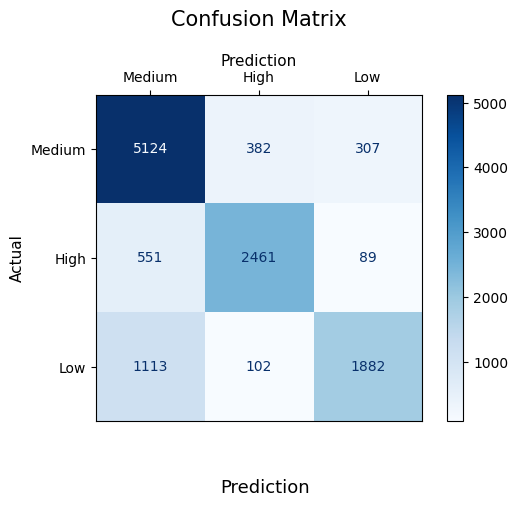

              precision    recall  f1-score   support

        High       0.84      0.79      0.81      3101
         Low       0.83      0.61      0.70      3097
      Medium       0.75      0.88      0.81      5813

    accuracy                           0.79     12011
   macro avg       0.81      0.76      0.78     12011
weighted avg       0.79      0.79      0.78     12011



In [59]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
plot_confusion(y_test, y_pred, lables)
print(classification_report(y_test, y_pred))

## Logistic Regression

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), 
      "penalty":["l1","l2", "elasticnet", None],
      'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
     }# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\Users\Khoula\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Khoula\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Khoula\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Khoula\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Khoula\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\K

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.825786009865516


accuracy = 0.8247439846807093


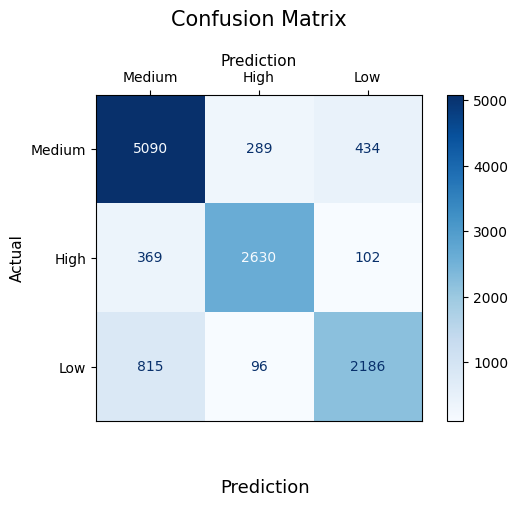

              precision    recall  f1-score   support

        High       0.87      0.85      0.86      3101
         Low       0.80      0.71      0.75      3097
      Medium       0.81      0.88      0.84      5813

    accuracy                           0.82     12011
   macro avg       0.83      0.81      0.82     12011
weighted avg       0.82      0.82      0.82     12011



In [62]:
lr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
plot_confusion(y_test, y_pred, lables)
print(classification_report(y_test, y_pred))

## SVM

In [ ]:
param_grid = {'C':np.logspace(-3,3,7),
              'gamma':[1,0.1,0.001,0.0001, 'scale', 'auto'], 
              'kernel':['linear','rbf', 'poly', 'sigmoid'],
             }

svm_cv=GridSearchCV(SVC(),param_grid,cv=5)
svm_cv.fit(X_train,y_train)


print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

accuracy = 0.8951794188660395


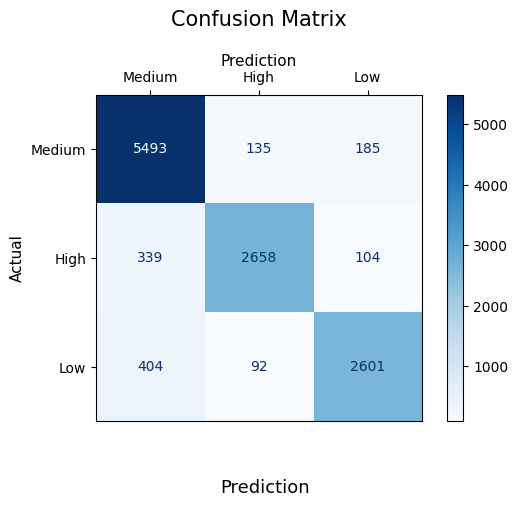

              precision    recall  f1-score   support

        High       0.92      0.86      0.89      3101
         Low       0.90      0.84      0.87      3097
      Medium       0.88      0.94      0.91      5813

    accuracy                           0.90     12011
   macro avg       0.90      0.88      0.89     12011
weighted avg       0.90      0.90      0.89     12011



In [76]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
plot_confusion(y_test, y_pred, lables)
print(classification_report(y_test, y_pred))

In [78]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 10)
DT.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10)

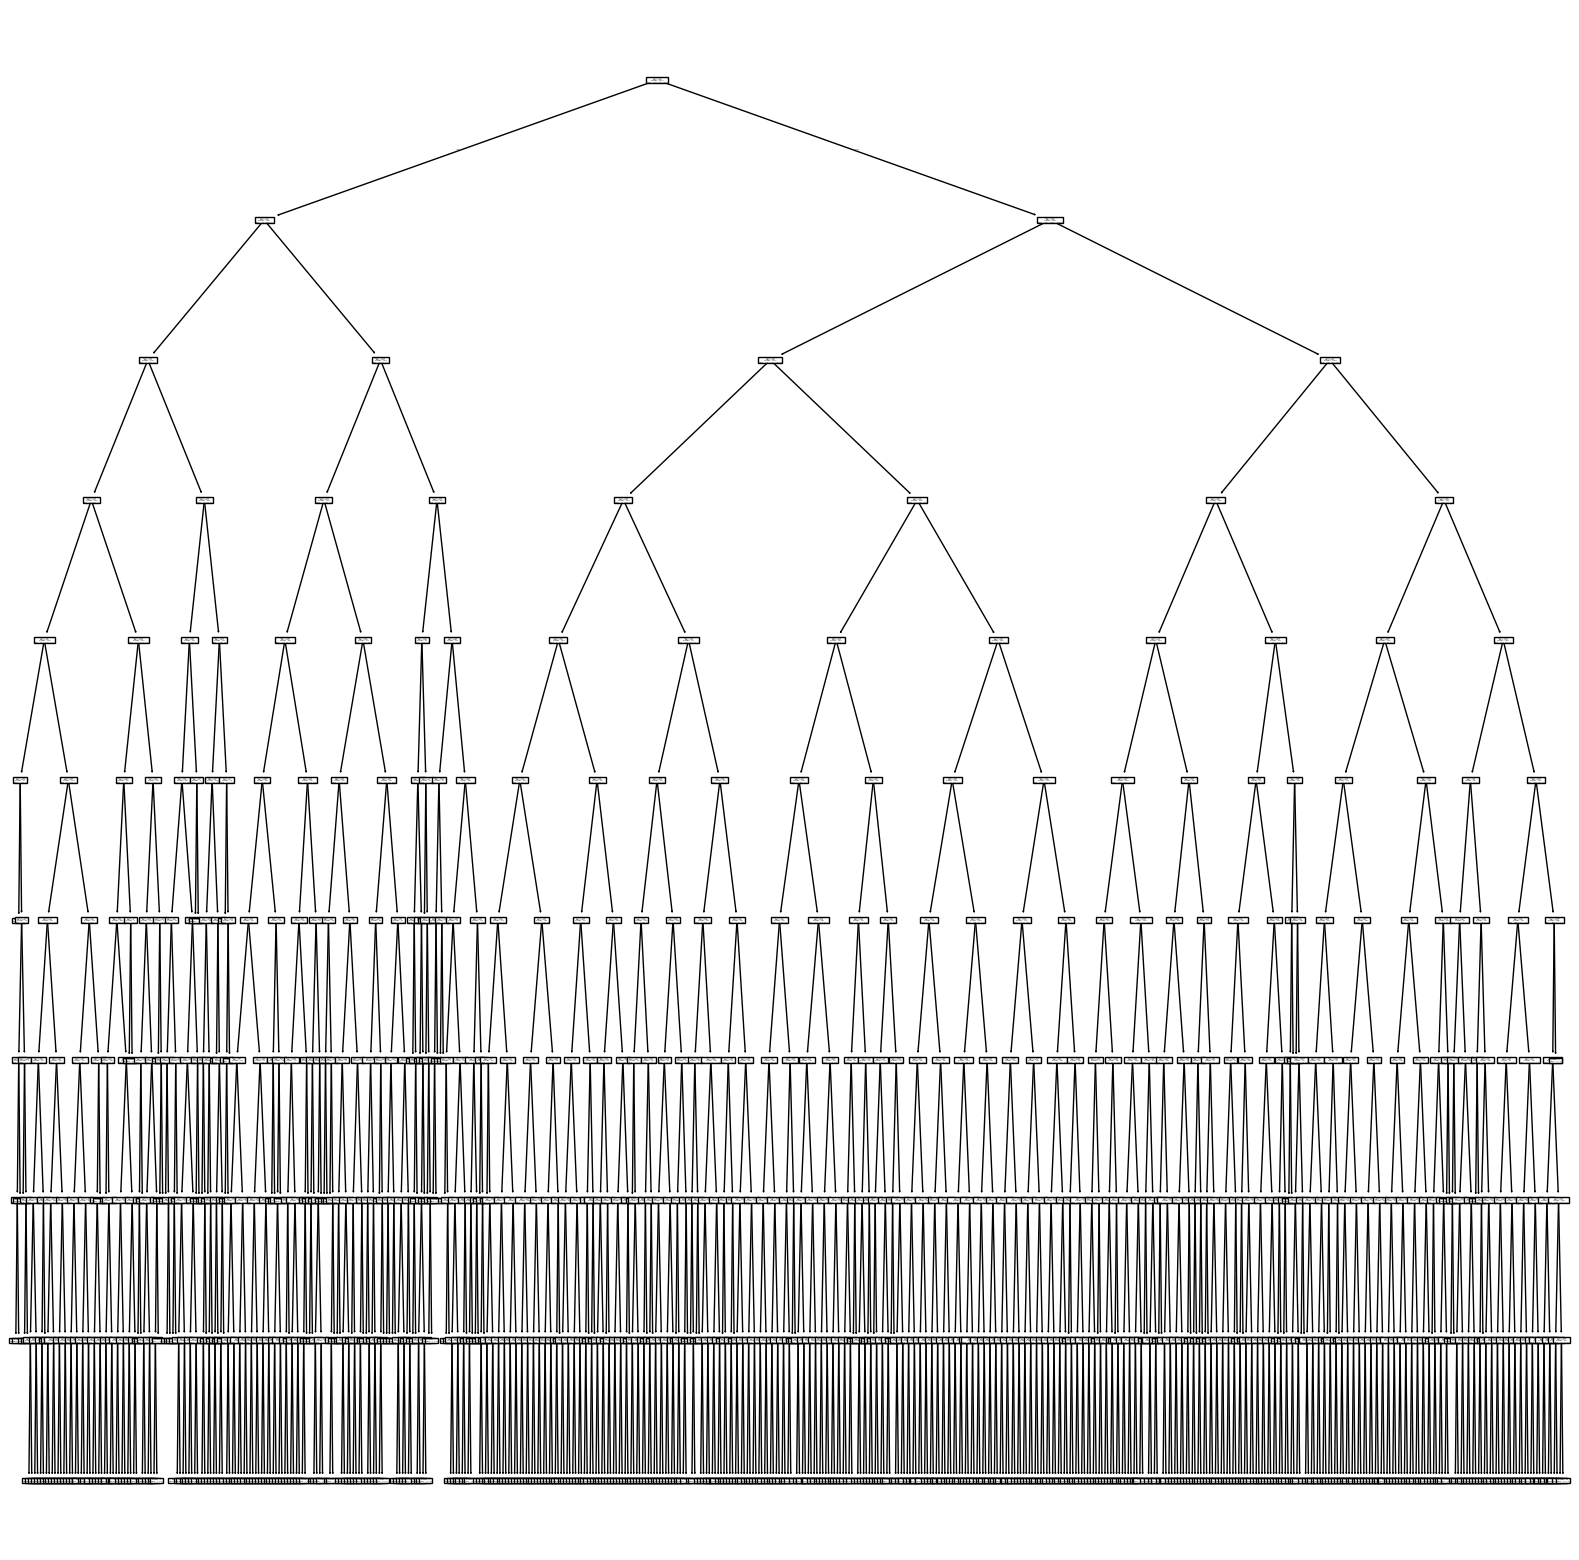

In [81]:
from sklearn import tree
plt.figure(figsize=(20, 20))
tree.plot_tree(DT)
plt.show()

accuracy = 0.8971775872117226


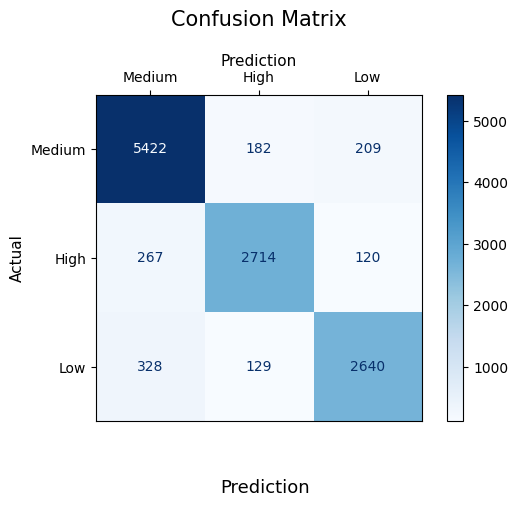

              precision    recall  f1-score   support

        High       0.90      0.88      0.89      3101
         Low       0.89      0.85      0.87      3097
      Medium       0.90      0.93      0.92      5813

    accuracy                           0.90     12011
   macro avg       0.90      0.89      0.89     12011
weighted avg       0.90      0.90      0.90     12011



In [80]:
y_pred = DT.predict(X_test)
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
plot_confusion(y_test, y_pred, lables)
print(classification_report(y_test, y_pred))